In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

Using TensorFlow backend.


In [9]:
num_classes = 2
img_rows,img_cols = 45,45
batch_size = 64

In [3]:
train_data_dir = '/Users/varun/Documents/Deep_Learning/mask_detection/experiements/dest_folder/train'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)


In [74]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					target_size=(img_rows,img_cols),
					class_mode='categorical',
                    batch_size = batch_size,
					shuffle=False,
                    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
					train_data_dir,
					target_size=(img_rows,img_cols),
					class_mode='categorical',
                    batch_size = batch_size,
					shuffle=False,
                    subset = 'validation')



Found 2254 images belonging to 2 classes.
Found 563 images belonging to 2 classes.


In [75]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))

model.add(Dense(2,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 45, 45, 32)        896       
_________________________________________________________________
activation_49 (Activation)   (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 45, 45, 32)        9248      
_________________________________________________________________
activation_50 (Activation)   (None, 45, 45, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_51 (Activation)   (None, 22, 22, 64)       

In [76]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['accuracy'])

In [77]:
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
epochs=5

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                validation_data = validation_generator,
                validation_steps = nb_validation_samples//batch_size)

Epoch 1/5
35/35 [==============================] - 29s 828ms/step - loss: 7.6679 - accuracy: 0.7443 - val_loss: 9.6030 - val_accuracy: 0.8320
Epoch 2/5
35/35 [==============================] - 28s 793ms/step - loss: 1.3444 - accuracy: 0.7155 - val_loss: 0.6864 - val_accuracy: 0.8878
Epoch 3/5
35/35 [==============================] - 28s 803ms/step - loss: 1.2592 - accuracy: 0.8128 - val_loss: 0.6192 - val_accuracy: 0.7695
Epoch 4/5
35/35 [==============================] - 28s 794ms/step - loss: 0.8619 - accuracy: 0.7096 - val_loss: 0.0247 - val_accuracy: 0.7255
Epoch 5/5
35/35 [==============================] - 28s 813ms/step - loss: 1.0308 - accuracy: 0.7326 - val_loss: 0.5276 - val_accuracy: 0.7255


In [78]:
history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                validation_data = validation_generator,
                validation_steps = nb_validation_samples//batch_size)

Epoch 1/5
35/35 [==============================] - 28s 811ms/step - loss: 0.8537 - accuracy: 0.7598 - val_loss: 0.9218 - val_accuracy: 0.8809
Epoch 2/5
35/35 [==============================] - 28s 809ms/step - loss: 0.6266 - accuracy: 0.8087 - val_loss: 0.3440 - val_accuracy: 0.9038
Epoch 3/5
35/35 [==============================] - 28s 801ms/step - loss: 0.6326 - accuracy: 0.8571 - val_loss: 0.1418 - val_accuracy: 0.9359
Epoch 4/5
35/35 [==============================] - 28s 798ms/step - loss: 0.2645 - accuracy: 0.8973 - val_loss: 0.2453 - val_accuracy: 0.8978
Epoch 5/5
35/35 [==============================] - 28s 808ms/step - loss: 0.3950 - accuracy: 0.8886 - val_loss: 0.2261 - val_accuracy: 0.9018


In [79]:
 history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=3,
                validation_data = validation_generator,
                validation_steps = nb_validation_samples//batch_size)

Epoch 1/3
35/35 [==============================] - 28s 803ms/step - loss: 0.2360 - accuracy: 0.9091 - val_loss: 0.2586 - val_accuracy: 0.9609
Epoch 2/3
35/35 [==============================] - 28s 802ms/step - loss: 0.1643 - accuracy: 0.9297 - val_loss: 0.3373 - val_accuracy: 0.9579
Epoch 3/3
35/35 [==============================] - 28s 809ms/step - loss: 0.9216 - accuracy: 0.9320 - val_loss: 0.2405 - val_accuracy: 0.9499


In [80]:
 history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=3,
                validation_data = validation_generator,
                validation_steps = nb_validation_samples//batch_size)

Epoch 1/3
35/35 [==============================] - 30s 867ms/step - loss: 0.2187 - accuracy: 0.9420 - val_loss: 7.7638 - val_accuracy: 0.8438
Epoch 2/3
35/35 [==============================] - 27s 783ms/step - loss: 0.3784 - accuracy: 0.9509 - val_loss: 0.1473 - val_accuracy: 0.9760
Epoch 3/3
35/35 [==============================] - 28s 802ms/step - loss: 0.1183 - accuracy: 0.9621 - val_loss: 0.0928 - val_accuracy: 0.9619


In [105]:
model.save('mask_detection.h5')

In [15]:
import cv2
import numpy as np

In [104]:
im = cv2.imread('14.jpg')
im = cv2.resize(im,(45,45))
im = im/255
im = np.expand_dims(im,axis = 0)
model.predict(im)

array([[0.0342889, 0.9657111]], dtype=float32)

In [108]:
import matplotlib.pyplot as plt

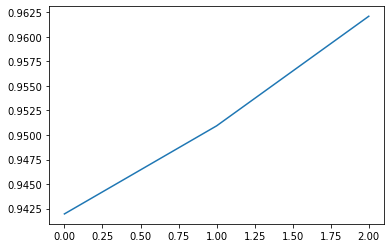

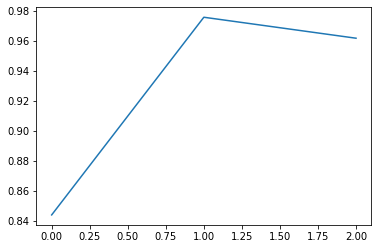

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure()
plt.plot(acc)
plt.figure()
plt.plot(val_acc)

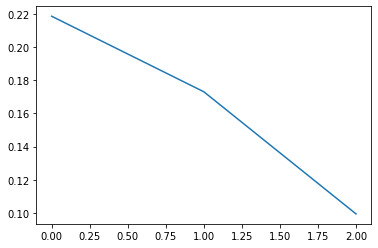

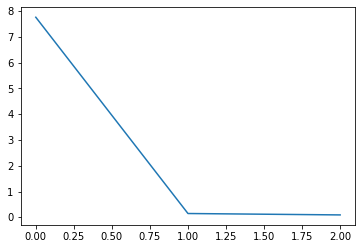

In [112]:
acc = history.history['loss']
val_acc = history.history['val_loss']
plt.figure()
plt.plot(acc)
plt.figure()
plt.plot(val_acc)